# Visualizing Data with Matplotlib

Let's first import some packages into our environment. Note that `%matplotlib inline` is an `IPython` magic command, which is not a part of standard Python syntax. Here `%matplotlib inline` enables the inline display of matplotlib figures so you don't need to do `plt.show()`.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

This is another `IPython` magic command that enables we to run bash commands in this environment. Let's first clone the "Motor Trend Car Road Tests" dataset. Note that the storage provided by Colab is not permanent (unless we [mount our Google Drive](https://colab.research.google.com/notebooks/io.ipynb)) so we need to be careful. If you would like to do your homework in this environment, please remeber to save your work (like plotted figures) locally.

In [3]:
!git clone https://gist.github.com/a412dfbd88b3db70b74b.git mtcars

Cloning into 'mtcars'...
remote: Enumerating objects: 3, done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 3
Unpacking objects: 100% (3/3), done.


Now let's import the `mtcars` dataset. It's in standard CSV format with header so we can import directly. Sometimes data may be seperated with tabs (or even worse a mixture of tabs and spaces) so we might need to desigante a seperator. Please refer to [this document](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) if you need more information.

In [14]:
cars = pd.read_csv("./mtcars/mtcars.csv")

In [15]:
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [16]:
num_cylinders = cars["cyl"].value_counts()
num_cylinders

8    14
4    11
6     7
Name: cyl, dtype: int64

Text(0, 0.5, 'Count')

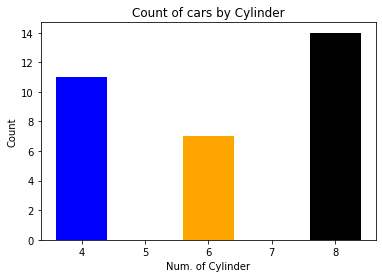

In [7]:
plt.bar(num_cylinders.keys(), num_cylinders, color=['black',  'blue', 'orange'])
plt.title("Count of cars by Cylinder")
plt.xlabel("Num. of Cylinder")
plt.ylabel("Count")

In [8]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2020-08-08 17:43:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2020-08-08 17:43:04 (91.0 MB/s) - ‘iris.data’ saved [4551/4551]



In [9]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names

--2020-08-08 17:43:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2998 (2.9K) [application/x-httpd-php]
Saving to: ‘iris.names’

iris.names          100%[===================>]   2.93K  --.-KB/s    in 0s      

2020-08-08 17:43:08 (81.1 MB/s) - ‘iris.names’ saved [2998/2998]



This dataset doesn't include the attribute names in its header so we need to specify them manually, or the first line of the file will be regarded as the header.

In [17]:
iris = pd.read_csv("./iris.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

In [21]:
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,class
86,6.7,3.1,4.7,1.5,Iris-versicolor
128,6.4,2.8,5.6,2.1,Iris-virginica
115,6.4,3.2,5.3,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
18,5.7,3.8,1.7,0.3,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
31,5.4,3.4,1.5,0.4,Iris-setosa
105,7.6,3.0,6.6,2.1,Iris-virginica
60,5.0,2.0,3.5,1.0,Iris-versicolor


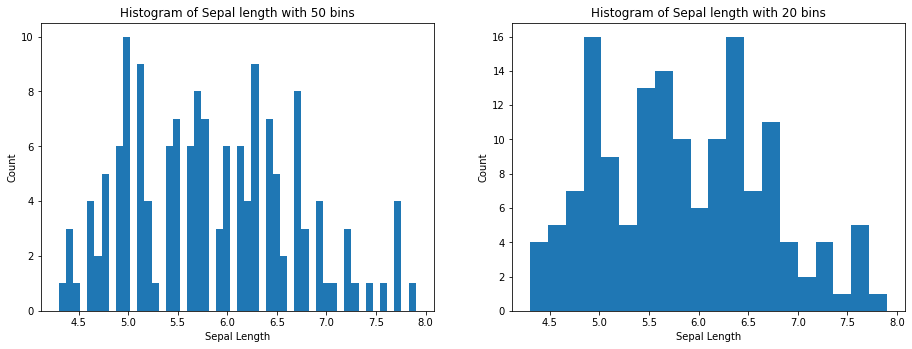

In [32]:
plt.subplot(1, 2, 1)
plt.hist(iris["sepal_length"], bins=50)
plt.xlabel("Sepal Length")
plt.ylabel("Count")
plt.title("Histogram of Sepal length with 50 bins")
plt.subplots_adjust(bottom=0, top=1, left=-0.5, right=1.5)
plt.subplot(1, 2, 2)
plt.hist(iris["sepal_length"], bins=20)
plt.xlabel("Sepal Length")
plt.ylabel("Count")
plt.title("Histogram of Sepal length with 20 bins")
plt.subplots_adjust(bottom=0, top=1, left=-0.5, right=1.5)

Text(0, 0.5, 'Count')

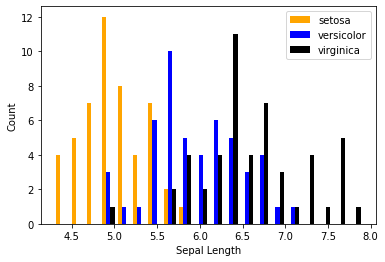

In [33]:
n_bins = 20

setosa = iris[iris["class"]=="Iris-setosa"]
versicolor = iris[iris["class"]=="Iris-versicolor"]
virginica = iris[iris["class"]=="Iris-virginica"]


colors = ['orange', 'blue', 'black']
labels = ['setosa','versicolor','virginica']
x_multi = [setosa["sepal_length"],versicolor["sepal_length"],virginica["sepal_length"]]
plt.hist(x_multi, n_bins, histtype='bar',color=colors,label= labels)
plt.legend(prop={'size': 10})
plt.xlabel("Sepal Length")
plt.ylabel("Count")